<a href="https://colab.research.google.com/github/tinySculpture/STINTSY-Project/blob/master/Project_Labor_Force_Survey-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Labor Force Survey 2016

Taken from the Philippine Statistics Authority (PSA), the dataset is a survey conducted in 2016 with respect in Demographic, Economic Characteristics and Past Quarter Activities of the surveyed individuals in this dataset. (To be enhanced after doing the project code and stuff)

## Task

Create a machine learning model for a classification task with the target variable: `PUFC23_PCLASS`

# Description of the Dataset

TBA

# Python libraries and modules used.

Imported the necessary libraries
- pandas, numpy, matplotlib.pyplot, and seaborn.


# Data Preprocessing

TBA

> ⚠ **Run these when using Google Colab**

In [1]:
# Run for google colab
!git clone https://github.com/tinySculpture/STINTSY-Project.git
%cd STINTSY-Project/

Cloning into 'STINTSY-Project'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 68 (delta 24), reused 41 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 21.27 MiB | 12.33 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/STINTSY-Project


In [2]:
!pip install ydata-profiling --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.1 MB/s eta 0:00:00


> ⚠ End of Cells for Google Colab

In [3]:
from itertools import combinations
%load_ext autoreload
%autoreload 2

# Import libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

# Import custom modules
import data_analysis

sns.set_theme("paper", "white")

## Read dataset

In [4]:
df = pd.read_csv("LFS PUF April 2016.CSV")

## Create a Profile Report
Using ydata-profiling, we can generate a profile report to get an overview of the dataset. A function can be defined to generate the report and save it as an HTML file.

In [5]:
def generate_report(dataframe, filename=""):
    report = ProfileReport(dataframe)
    report.to_file(filename + ".html")

In [6]:
generate_report(df, 'report-raw')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 50/50 [00:26<00:00,  1.86it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Cleaning

1. Force Missing Values to NaN to correctly identify missing values because of different data types. (Int, Float, and Object)
2. Delete duplicated rows (keep the first instance)

There are missing data that are represented as different invisible characters - replace them with an empty string

In [7]:
df.isna().sum()

,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


In [8]:
# df.replace(["", " ", "NA", "N/A", "-", "NULL"], np.nan, inplace=True)
df.replace("", np.nan, inplace=True)

In [9]:
df = df.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

### Sanity Checking
Check if missing data is properly replaced with NaN

In [10]:
df

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,NaN,8,NaN,NaN,NaN,2,NaN,NaN,NaN,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Impute missing values

- Fill numerical columns with their *mean*.
- Fill categorical values with their *mode*.

In [11]:
# Replace numeric values with mean
df.fillna(df.select_dtypes(include=["number"]).mean(numeric_only=True), inplace=True)

# Replace categorical values with mode
for col in df.select_dtypes(include=["object"]):
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "unknown"
    df[col] = df[col].fillna(mode_value)

df

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,002,7,1,1,1,1,52,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,002,7,1,1,1,1,52,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,002,8,1,1,1,2,52,1,01,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,002,7,1,1,1,1,52,1,01,1
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,002,7,1,1,1,1,52,1,01,1


### Delete Unnecessary Columns

- Delete constant values (Month, Year)
    - PUFSVYYR
    - PUFSVYMO
- Delete IDs
    - PUFPRRCD (-0.035)
    - PUFHHNUM (0.021)
    - PUFREG (0.020)
- Delete Columns with low correlation to target variable (Within -0.05 to +0.05)
    - PUF10_CONWR (0.037)
    - PUFC14_PROCC (-0.490)
    - PUFC25_PBASIC (0.035)
    - PUFC27_NJOBS (0.035)
    - PUFC31_FLWRK (0.026)
    - PUFC32_JOBSM (0.031)
    - PUFC33_WEEKS (-0.014)
    - PUFC34_WYNOT (-0.019)
    - PUFC35_LTLOOKW (0.026)
    - PUFC37_WILLING (0.046)
    - PUFPRV (-0.035)
    - PUFRPL (0.004)
- Delete data not useful for prediction
    - PUFC41_WQTR - Work in the previous quarter
    - PUFC43_QKB - Kind of business in the previous quarter
    - PUFC40_POCC - Previous occupation if unemployed (we need employment class)
    - PUFWGTFIN - Weight used for surveying
    - PUFPSU - Primary Sampling Unit (PSU) useful for survey design but not for prediction
    - PUFC12_JOB - PUFC11_WORK is more useful
    - PUFC36_AVAIL - Availability for work (useful for unemployed people)

In [12]:
drop_cols = [
    # IDs, Constants
    "PUFSVYYR", "PUFSVYMO", "PUFPRRCD", "PUFHHNUM", "PUFREG",
    # Low correlation
    "PUFC10_CONWR", "PUFC14_PROCC", "PUFC25_PBASIC", "PUFC27_NJOBS", "PUFC31_FLWRK", "PUFC32_JOBSM", "PUFC33_WEEKS", "PUFC34_WYNOT", "PUFC35_LTLOOKW", "PUFC37_WILLING", "PUFPRV", "PUFRPL",
    # Not useful for prediction of type of worker
    "PUFC41_WQTR", "PUFC43_QKB", "PUFC40_POCC", "PUFPWGTFIN", "PUFPSU", "PUFC12_JOB", "PUFC36_AVAIL",
]
df.drop(columns=drop_cols, inplace=True)

In [13]:
df

,PUFURB2K10,PUFHHSIZE,PUFC01_LNO,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,PUFC09_GRADTECH,...,PUFC21_PLADDW,PUFC22_PFWRK,PUFC23_PCLASS,PUFC24_PBASIS,PUFC26_OJOB,PUFC28_THOURS,PUFC29_WWM48H,PUFC30_LOOKW,PUFC38_PREVJOB,PUFNEWEMPSTAT
0,2,3,1,1,1,49,2,350,1,2,...,1,2,3,4,1,032,1,2,1,1
1,2,3,2,2,2,61,2,350,1,2,...,2,2,6,4,2,008,1,2,1,1
2,2,3,3,3,1,19,1,350,2,2,...,1,2,1,3,1,034,1,2,1,1
3,2,4,1,1,1,48,2,320,1,2,...,1,2,3,4,1,033,1,2,1,1
4,2,4,2,2,2,41,2,350,1,2,...,2,2,0,4,2,072,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,2,5,1,1,1,29,2,350,1,2,...,2,2,4,4,2,040,1,2,1,1
180858,2,5,2,2,2,29,2,830,1,2,...,2,2,1,4,2,048,1,2,2,3
180859,2,5,3,3,2,4,1,350,1,2,...,2,2,1,4,2,048,1,2,1,1
180860,2,5,4,3,2,2,1,350,1,2,...,2,2,1,4,2,048,1,2,1,1


### Recheck EDA

Check if the data has been changed significantly, and if the statistical tests are still the same after imputation and feature reduction.

In [20]:
#generate_report("report-cleaned")

After checking the EDA again, duplicate data is present since there are columns that have been deleted.

In [17]:
print("Duplicates: ", df.duplicated().sum())

Duplicates:  57893


In [18]:
df = df.drop_duplicates()
print("Duplicates after dropping: ", df.duplicated().sum())

Duplicates after dropping:  0


#### Binning and Encoding

- One-hot encode categorical values

In [21]:
# One hot encode binary categorical columns
cat_cols = ['PUFURB2K10', 'PUFC04_SEX', 'PUFC08_CURSCH', 'PUFC09_GRADTECH', 'PUFC11_WORK',]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=float)
df = df.rename(
    columns = {
        "PUFURB2K10_2": "Is_Rural",
        "PUFC04_SEX_2": "Is_Female",
        "PUFC08_CURSCH_2": "Is_Not_In_School",
        "PUFC09_GRADTECH_2": "Is_Not_In_Techvoc",
        "PUFC11_WORK_2": "Is_Not_Working"
    }
)

#### PUFC07_GRADE
This classification data contains a lot of values in the value set. It can be noticed that there are different values for highest educational attainment and the program category. Since they are only one column, it might be better to encode the highest educational attainment as an ordinal encoded variable, and the program category as 15 different categories instead of 50+.

In [22]:
education_categories = {
    "Primary": ["000", "010", "210", "220", "230", "240", "250", "260", "280"],
    "Secondary": ["310", "320", "330", "340", "350"],
    "Post-Secondary": ["410", "420", "810", "820", "830", "840", "900"],
    "STEM": ["542", "544", "548", "552", "554", "558", "562", "564", "572", "642", "644", "646", "648", "652", "654", "658", "662", "664", "672"],
    "Business": ["534", "634", "638"],
    "Art": ["521", "522", "531", "532", "621", "622", "631", "632"],
    "Other": ["501", "508", "509", "514", "576", "581", "584", "585", "586", "601", "614", "676", "681", "684", "685", "686", "589", "689"]
}


def get_education_category(x):
    for key, values in education_categories.items():
        if x in values:
            return key
    return "Unknown"

In [23]:
df_col = "PUFC07_GRADE"
df_new_col = "Education"

In [24]:
df[df_new_col] = df[df_col].apply(get_education_category)

# One hot encode the new categories
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded = encoder.fit_transform(df[[df_new_col]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([df_new_col]), index=df.index)

df = pd.concat([df, encoded_df], axis=1)

In [25]:
df.isna().sum()

,0
PUFHHSIZE,0
PUFC01_LNO,0
PUFC03_REL,0
PUFC05_AGE,0
PUFC06_MSTAT,0
PUFC07_GRADE,0
PUFC16_PKB,0
PUFC17_NATEM,0
PUFC18_PNWHRS,0
PUFC19_PHOURS,0


### PUFC16_PKB
The valueset offers a binning for this column already. The values are binned into 3 categories: Agriculture, Industry, Services.

In [26]:
industry_categories = {
    "Agriculture": range(1, 3),
    "Industry": range(5, 43),
    "Services": range(45, 99)
}

def get_industry_category(x):
    for key, values in industry_categories.items():
        if x in values:
            return key
    return "Unknown"

In [27]:
df_col = "PUFC16_PKB"
df_new_col = "KindOfBusiness"

In [28]:
df[df_new_col] = pd.to_numeric(df[df_col], errors="coerce").apply(get_industry_category)

# One hot encode the new categories
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded = encoder.fit_transform(df[[df_new_col]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([df_new_col]), index=df.index)

df = pd.concat([df, encoded_df], axis=1)

In [29]:
df.drop(columns=["PUFC07_GRADE", "Education", df_col, df_new_col], inplace=True)

In [30]:
df.isna().sum()

,0
PUFHHSIZE,0
PUFC01_LNO,0
PUFC03_REL,0
PUFC05_AGE,0
PUFC06_MSTAT,0
PUFC17_NATEM,0
PUFC18_PNWHRS,0
PUFC19_PHOURS,0
PUFC20_PWMORE,0
PUFC21_PLADDW,0


### Check for Multicollinearity

Use Variance Inflation Factor (VIF) to check for multicollinearity. If the VIF is greater than 10, then the variable is highly correlated with other variables and should be removed.

In [31]:
test_numerical = df.select_dtypes(include=["number"])

vif_data = pd.DataFrame()
vif_data["feature"] = test_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(test_numerical.values, i) for i in range(len(test_numerical.columns))]

vif_data

,feature,VIF
0,PUFHHSIZE,8.648373
1,PUFC01_LNO,8.362195
2,PUFC03_REL,5.222512
3,PUFC05_AGE,6.667567
4,Is_Rural,2.505589
5,Is_Female,2.145504
6,Is_Not_In_School,1.387083
7,Is_Not_In_Techvoc,18.971477
8,Is_Not_Working,4.330827
9,Education_Business,2.387414


In [32]:
df = df.drop(columns=["PUFC01_LNO", "Is_Not_In_Techvoc", "Education_Secondary", "Education_Primary"])

In [33]:
test_numerical = df.select_dtypes(include=["number"])

vif_data = pd.DataFrame()
vif_data["feature"] = test_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(test_numerical.values, i) for i in range(len(test_numerical.columns))]

vif_data

,feature,VIF
0,PUFHHSIZE,4.883773
1,PUFC03_REL,3.332658
2,PUFC05_AGE,3.705497
3,Is_Rural,2.191061
4,Is_Female,2.129958
5,Is_Not_In_School,1.312511
6,Is_Not_Working,3.534753
7,Education_Business,1.097571
8,Education_Other,1.112745
9,Education_Post-Secondary,1.187331


In [ ]:
generate_report(df, "report-encoded")

# Initial Logistic Regression Model

In [34]:
df

,PUFHHSIZE,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC17_NATEM,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC20_PWMORE,PUFC21_PLADDW,PUFC22_PFWRK,...,Is_Female,Is_Not_In_School,Is_Not_Working,Education_Business,Education_Other,Education_Post-Secondary,Education_STEM,KindOfBusiness_Industry,KindOfBusiness_Services,KindOfBusiness_Unknown
0,3,1,49,2,1,08,024,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,2,61,2,2,04,008,2,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,19,1,2,08,024,1,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,48,2,1,04,020,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2,41,2,1,12,072,2,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180852,7,3,11,1,1,08,048,2,2,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180853,7,3,10,1,1,08,048,2,2,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180857,5,1,29,2,1,08,040,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
180858,5,2,29,2,1,08,048,2,2,2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Libraries for the model

In [42]:
from logistic_model import train_logistic_regression, load_logistic_model
from sklearn.metrics import classification_report

In [43]:
df_copy = df.copy() # copy of original dataframe just to avoid any changes to original dataframe

Preparing data from data frame

In [44]:
features = ['PUFPWGTFIN', 'PUFPSU', 'PUFHHSIZE', 'PUFC03_REL',
       'PUFC05_AGE', 'PUFC06_MSTAT', 'PUFC07_GRADE', 'PUFC08_CURSCH',
       'PUFC09_GRADTECH', 'PUFC11_WORK', 'PUFC12_JOB', 'PUFC16_PKB',
       'PUFC17_NATEM', 'PUFC18_PNWHRS', 'PUFC19_PHOURS', 'PUFC20_PWMORE',
       'PUFC21_PLADDW', 'PUFC22_PFWRK', 'PUFC23_PCLASS', 'PUFC24_PBASIS',
       'PUFC26_OJOB', 'PUFC28_THOURS', 'PUFC29_WWM48H', 'PUFC30_LOOKW',
       'PUFC36_AVAIL', 'PUFC38_PREVJOB', 'PUFC40_POCC', 'PUFC41_WQTR',
       'PUFC43_QKB', 'PUFNEWEMPSTAT', 'Education', 'Rural_Area'] # removed 'Program' because it was causing error in model training
target = 'PUFC23_PCLASS'


Training the model (run once or conditionally). Also, the model will be saved in logistic_model.pkl

In [45]:
train_logistic_regression(df_copy, features, target)

KeyError: "['PUFPWGTFIN', 'PUFPSU', 'PUFC07_GRADE', 'PUFC08_CURSCH', 'PUFC09_GRADTECH', 'PUFC11_WORK', 'PUFC12_JOB', 'PUFC16_PKB', 'PUFC36_AVAIL', 'PUFC40_POCC', 'PUFC41_WQTR', 'PUFC43_QKB', 'Education', 'Rural_Area'] not in index"

Load the model and scaler

In [48]:
saved = load_logistic_model()
model = saved['model']
scaler = saved['scaler']


Using the model for prediction

In [49]:
X_test_scaled = scaler.transform(df[features])  # example batch only
y_pred = model.predict(X_test_scaled)

KeyError: "['PUFPWGTFIN', 'PUFPSU', 'PUFC07_GRADE', 'PUFC08_CURSCH', 'PUFC09_GRADTECH', 'PUFC11_WORK', 'PUFC12_JOB', 'PUFC16_PKB', 'PUFC36_AVAIL', 'PUFC40_POCC', 'PUFC41_WQTR', 'PUFC43_QKB', 'Education', 'Rural_Area'] not in index"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Results

In [ ]:
print(classification_report(df_copy[target], y_pred))

The classification report shows that the model achieved an overall accuracy of 1.00, indicating perfect performance on the dataset. However, this unusually high accuracy may suggest the presence of class imbalance or overfitting. Upon further inspection, the performance per class reveals the following:

* Class 1 is the dominant class with 141,556 support. It achieves perfect precision, recall, and F1-score, which is expected due to the large number of samples.

* Classes 0, 2, 3, 4, and 6 also demonstrate near-perfect performance with precision, recall, and F1-scores close to or equal to 1.00, indicating that the model performs very well on these classes.

* Class 5, however, is problematic. Despite having a precision of 0.90, it suffers from a low recall of 0.60, meaning the model fails to identify 40% of actual Class 5 instances. Its F1-score drops to 0.72, which is significantly lower than the other classes. This class also has very low support with only 216 samples, contributing to its poor performance.



There are two main issues as seen from the results. Firstly, Class 1 heavily outweighs all other classes, making the model biased toward predicting this class. This imbalance can skew performance metrics and mask poor detection of minority classes. On the other hand, Class 5 being a minority class with very low training samples struggles to generalize well on this class, as shown by the low recall, resulting in many false negatives.

### K-NN Algorithm

##### Using K-NN as a machine learning model for classification in  with the target variable of **PUFC23_PCLASS** to test if imputed variables match of the machine learning

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Impute the rows with NaN values;
If categorical, fill with mode.
If numerical, fill with mean.
then concatinate them together


In [47]:
df

,PUFHHSIZE,PUFC03_REL,PUFC05_AGE,PUFC06_MSTAT,PUFC17_NATEM,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC20_PWMORE,PUFC21_PLADDW,PUFC22_PFWRK,...,Is_Female,Is_Not_In_School,Is_Not_Working,Education_Business,Education_Other,Education_Post-Secondary,Education_STEM,KindOfBusiness_Industry,KindOfBusiness_Services,KindOfBusiness_Unknown
0,3,1,49,2,1,08,024,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,2,61,2,2,04,008,2,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,19,1,2,08,024,1,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,48,2,1,04,020,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2,41,2,1,12,072,2,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180852,7,3,11,1,1,08,048,2,2,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180853,7,3,10,1,1,08,048,2,2,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180857,5,1,29,2,1,08,040,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
180858,5,2,29,2,1,08,048,2,2,2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Encoding

In [53]:
X = df.drop(columns=['PUFC23_PCLASS'])
y = df['PUFC23_PCLASS']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
classifier  = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = classifier.predict(X_test)
print(y_pred.tolist())

['1', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '1', '1', '1', '2', '1', '3', '1', '1', '1', '3', '1', '1', '1', '3', '1', '6', '1', '3', '1', '1', '1', '1', '1', '1', '3', '1', '1', '1', '1', '1', '1', '1', '1', '6', '1', '3', '1', '3', '3', '1', '1', '1', '1', '3', '3', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '6', '3', '1', '1', '1', '1', '1', '1', '4', '3', '1', '1', '1', '1', '3', '1', '1', '1', '1', '1', '1', '3', '1', '3', '1', '1', '3', '1', '1', '1', '1', '3', '1', '1', '0', '1', '1', '1', '1', '3', '1', '3', '3', '1', '1', '1', '3', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '3', '1', '6', '1', '3', '1', '2', '1', '3', '1', '1', '1', '1', '1', '1', '1', '3', '3', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '3', '1', '1', '1', '1', '3', '1', '1', '1', '3', '3', '3', '3', '1', '3', '2', '1', '1', '1', '1', '1', '1', '3', '1', '3', '1', '1', '3', '1', '6', '4', '3', '1', '1', '3', '1',

In [58]:
print("\n" + classification_report(y_test, y_pred) + "\n")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.41      0.32      0.36       668
           1       0.91      0.91      0.91     16857
           2       0.56      0.46      0.51      1249
           3       0.61      0.75      0.67      4114
           4       0.13      0.02      0.03       452
           5       0.50      0.02      0.05        42
           6       0.54      0.40      0.46      1212

    accuracy                           0.80     24594
   macro avg       0.52      0.41      0.43     24594
weighted avg       0.79      0.80      0.79     24594


[[  212   205    17   200     1     0    33]
 [  173 15390   313   832     7     1   141]
 [   23   492   579   140     2     0    13]
 [   73   609    90  3091    37     0   214]
 [    4    85     6   329     8     0    20]
 [    5    24     3     6     0     1     3]
 [   26   192    26   474     6     0   488]]


Accuracy: 82%

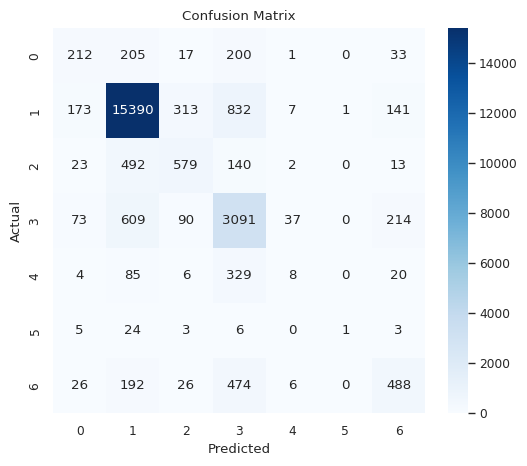

In [67]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()